# **PySpark Analysis: NYC TLC Trips Records (FHVHV) Data Feb 2021**

**by: Febrianti**

## **Set Up**

In [28]:
# Import libraries
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
import pandas_gbq

import warnings
warnings.filterwarnings('ignore')

In [29]:
spark = SparkSession.builder\
        .master("local[*]")\
        .appName('tripdata_21-02')\
        .getOrCreate()

In [30]:
# Download dataset from website
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2021-02.parquet

--2023-03-18 16:53:53--  https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2021-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.161.108.141, 18.161.108.231, 18.161.108.77, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.161.108.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 302633211 (289M) [application/x-www-form-urlencoded]
Saving to: 'fhvhv_tripdata_2021-02.parquet.1'

ipdata_2021-02.parq  14%[=>                  ]  40.95M  3.03MB/s    eta 90s    ^C


In [ ]:
# Read parquet file using pandas
df = pd.read_parquet('fhvhv_tripdata_2021-02.parquet')

In [ ]:
# Displays the top 5 data
df.head(5)

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B02764,B02764,2021-01-31 23:59:00,2021-02-01 00:10:19,2021-02-01 00:10:40,2021-02-01 00:21:09,35,39,2.060,...,1.52,0.0,NaN,0.0,9.79,N,N,,N,N
1,HV0003,B02764,B02764,2021-02-01 00:13:35,2021-02-01 00:25:23,2021-02-01 00:27:23,2021-02-01 00:44:01,39,35,3.150,...,2.85,0.0,NaN,0.0,24.01,N,N,,N,N
2,HV0005,B02510,None,2021-02-01 00:12:55,NaT,2021-02-01 00:28:38,2021-02-01 00:38:27,39,91,1.776,...,1.12,0.0,NaN,0.0,6.91,N,N,N,N,N
3,HV0005,B02510,None,2021-02-01 00:36:01,NaT,2021-02-01 00:43:37,2021-02-01 01:23:20,91,228,13.599,...,2.91,0.0,NaN,7.0,35.05,N,N,N,N,N
4,HV0003,B02872,B02872,2021-01-31 23:57:50,2021-02-01 00:08:25,2021-02-01 00:08:42,2021-02-01 00:17:57,126,250,2.620,...,1.38,0.0,NaN,0.0,8.53,N,N,,N,N


In [ ]:
# Read parquet file using spark
df = spark.read \
    .option("header", "true") \
    .parquet('fhvhv_tripdata_2021-02.parquet')

**notes**: read parquet file using spark takes only 5.5s while using pandas is 20.7s

In [ ]:
# Check schema
df.printSchema()

root
 |-- hvfhs_license_num: string (nullable = true)
 |-- dispatching_base_num: string (nullable = true)
 |-- originating_base_num: string (nullable = true)
 |-- request_datetime: timestamp (nullable = true)
 |-- on_scene_datetime: timestamp (nullable = true)
 |-- pickup_datetime: timestamp (nullable = true)
 |-- dropoff_datetime: timestamp (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- trip_miles: double (nullable = true)
 |-- trip_time: long (nullable = true)
 |-- base_passenger_fare: double (nullable = true)
 |-- tolls: double (nullable = true)
 |-- bcf: double (nullable = true)
 |-- sales_tax: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: double (nullable = true)
 |-- tips: double (nullable = true)
 |-- driver_pay: double (nullable = true)
 |-- shared_request_flag: string (nullable = true)
 |-- shared_match_flag: string (nullable = true)
 |-- access_a_ride_flag: string (nul

In [ ]:
# sets as a temporary view so we can apply SQL syntax to query it
df.createOrReplaceTempView('tripdata')

### **1. How many taxi trips were there on February 15?**

In [ ]:
trips_feb15 = spark.sql(
    """
    SELECT
        COUNT(*) trips_feb15 
    FROM 
        tripdata
    Where
        CAST(pickup_datetime AS date) = '2021-02-15' 
    """
)
trips_feb15.show()

+-----------+
|trips_feb15|
+-----------+
|     425928|
+-----------+



### **2. Find the longest trip for each day!**

In [ ]:
longest_trip = spark.sql(
    """
    SELECT 
        CAST(pickup_datetime AS date) date,
        MAX(trip_miles) AS longest_trip
    FROM tripdata
    WHERE pickup_datetime IS NOT NULL
    GROUP BY 1
    ORDER BY 1
    """
)
longest_trip.show(10)


+----------+------------+
|      date|longest_trip|
+----------+------------+
|2021-02-01|      212.43|
|2021-02-02|      282.78|
|2021-02-03|      184.26|
|2021-02-04|      203.97|
|2021-02-05|      245.35|
|2021-02-06|      275.32|
|2021-02-07|      216.36|
|2021-02-08|       253.5|
|2021-02-09|      480.73|
|2021-02-10|       512.5|
+----------+------------+
only showing top 10 rows



### **3. Find Top 5 Most frequent dispatching_base_num!**

In [ ]:
top5_dbn = spark.sql(
    """
    SELECT
        dispatching_base_num AS top5_dispatching_base_num,
        count(dispatching_base_num) AS total_trip
    FROM 
        tripdata
    GROUP BY 1
    ORDER BY 2 DESC
    LIMIT 5
    """
)
top5_dbn.show()


+-------------------------+----------+
|top5_dispatching_base_num|total_trip|
+-------------------------+----------+
|                   B02510|   3233664|
|                   B02764|    965568|
|                   B02872|    882689|
|                   B02875|    685390|
|                   B02765|    559768|
+-------------------------+----------+



### **4. Find Top 5 Most common location pairs (PUlocationID and DOlocationID)!**

In [ ]:
com_loc_pairs = spark.sql(
    """
    SELECT
        PULocationID,
        DOLocationID,
        COUNT(*) AS total_trip
    FROM
        tripdata
    GROUP BY 1,2
    ORDER BY 3 DESC
    LIMIT 5 

    """
)
com_loc_pairs.show()

+------------+------------+----------+
|PULocationID|DOLocationID|total_trip|
+------------+------------+----------+
|          76|          76|     45041|
|          26|          26|     37329|
|          39|          39|     28026|
|          61|          61|     25976|
|          14|          14|     17934|
+------------+------------+----------+



### **5. Write all of the result to BigQuery table**

In [41]:
# Change to pandas dataframe
pd_trips_feb15 = trips_feb15.toPandas()
pd_longest_trip = longest_trip.toPandas()
pd_top5_dbn = top5_dbn.toPandas()
pd_com_loc_pairs = com_loc_pairs.toPandas()

In [38]:
pd_longest_trip['date'] = pd_longest_trip['date'].astype(str)
pd_longest_trip['date'] = pd_longest_trip['date'].apply(pd.to_datetime)

In [40]:
# Droject id on Google Cloud Platform
project_id = 'datafellowship9'

# Dataset id where we want to store data
dataset_id = 'fhvhv_feb21'

# Create function to load data
def load_to_bq(df, table_name):
    pandas_gbq.to_gbq(df, f'{dataset_id}.{table_name}', project_id=project_id)

# Call function to load data
load_to_bq(pd_trips_feb15, 'trips_feb15')
load_to_bq(pd_longest_trip, 'longest_trip')
load_to_bq(pd_top5_dbn, 'top5_dbn')
load_to_bq(pd_com_loc_pairs, 'com_loc_pairs')

100%|██████████| 1/1 [00:00<00:00, 2222.74it/s]


**Check the result on BigQuery:**

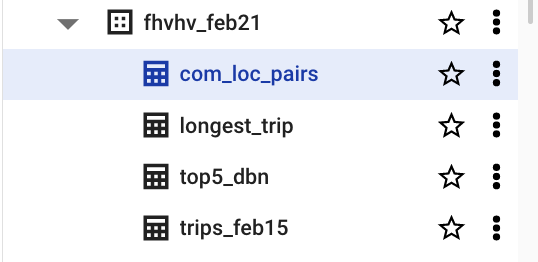

**Check one of the tables if the contents match:**

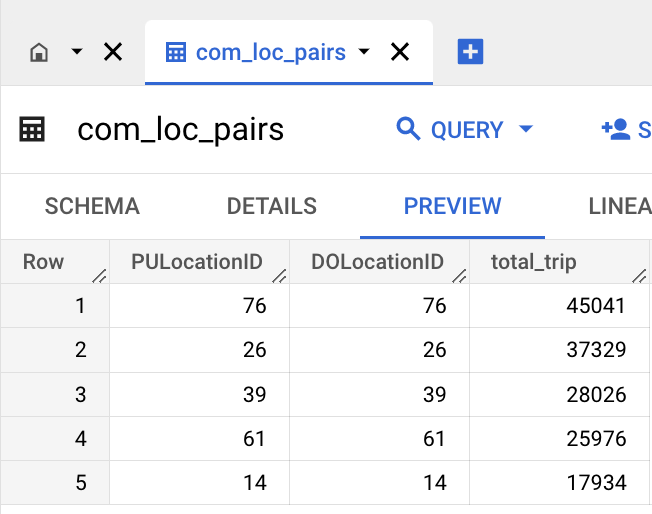